# Removal continuum 
Obtain comparative plot between spectral curves
Obtain the plot of velocities range used im ALMA (for remove the continuum) 

- 102.51146 GHz
- 102.47862 GHz


#### ------------------------------------ Import the necessary Package -------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from astropy.io import fits
from spectral_cube import SpectralCube
from astropy.coordinates import SpectralQuantity
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

#### ------------------------------------------------- Define the parameters ------------------------------------------------

In [81]:
## Necesitamos la velocidad de la luz para la aplicación de la fórmula Doppler
C = const.c.to(u.km / u.s).value * u.km/u.s  # Velocidad de la luz en km/s
print('\nVelocidad de la luz (C):', C)

# Define the filenames of the two data cubes

file1 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/CORRECT/CII/CII_N159_SPAT_RES.fits'  # Replace with the actual filename of the first cube (this case, first cube is original cube with the VRAD transformed)
file2 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/CORRECT/CF+/CF+_N159_sci_VELAXIS_inK_SPECT_SPAT_RES.fits'  # Replace with the actual filename of the second cube (this case, second cube is the cube with the spectral resolution changed)

# Open the FITS files
cube1 = SpectralCube.read(file1)
cube2 = SpectralCube.read(file2)

print(cube1.header)
print(cube2.header)

# Define the frequency (in Hz) where we have the emission line
# CF+ Emission
freq1_CF = 102.51146 * u.GHz
freq2_CF = 102.47862 * u.GHz
# Other line (nn)
freq1_nn = 102.47203 * u.GHz
freq2_nn = 102.45554 * u.GHz

print(f'Frequencies to use in CF: {freq1_CF, freq2_CF}')
print(f'Frequencies to use in other line: {freq1_nn, freq2_nn}')

# Range of velocities for generate the polinomial fit
fit_range_km_s = (220., 255.) # Rango para el ajuste lineal
#fit_range_km_s = (274, 436) 

# You can change the order of the polynomial here
polynomial_order = 0

# Define the spatial pixel to obtain the intensity
#x = 63
#y = 73

# Define the coordinate to obtain the spectrum 
#coord = SkyCoord("05h39m36.0919s", "-69d45m41.651s", frame='icrs')
coord = SkyCoord('05h39m36.5s', '-69d45m35.0s', frame='icrs') # used on proposal APEX

# RA y Dec en formato sexagesimal (HH:MM:SS, DD:MM:SS)
ra_str = coord.ra.to_string(unit=u.hour, sep=':', precision=3, pad=True)   # '05:39:36.675'
dec_str = coord.dec.to_string(unit=u.deg, sep=':', precision=3, alwayssign=True, pad=True) # '-69:46:00.260'
print(ra_str, dec_str)

# Define the output filenames
#output = 
#output_rms =




Velocidad de la luz (C): 299792.458 km / s
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    3                                                  NAXIS1  =                   70                                                  NAXIS2  =                   60                                                  NAXIS3  =                  300                                                  RESTFRQ =                  0.0                                                  VELREF  =                    0                                                  BMAJ    = 0.004444444444444444                                                  BMIN    = 0.004444444444444444                                                  BPA     =                  0.0                                                  BUNIT   = 'K       '           / Brightness unit in Kelvin                  

#### -------------------------------------------- Extract necessary parameters ------------------------------------

In [82]:
# Transform to pixel
# Obtain the integrated intensity in each position of cubes from files
try:
    hdu1 = fits.open(file1)[0]
    cube1_wcs = WCS(hdu1.header, naxis=2)
    data1 = hdu1.data
    
    hdu2 = fits.open(file2)[0]
    cube2_wcs = WCS(hdu2.header, naxis=2)
    data2 = hdu2.data

except FileNotFoundError as e:
    print(f"Error: Archivo no encontrado. Por favor, verifica la ruta: {e}")
    exit()

print(cube1_wcs)
print(f'header 1: {repr(hdu1.header)}')
print('-----------------------------------')
#print(cube2_wcs)
print(f'header 2: {repr(hdu2.header)}')
print('-----------------------------------')

# Convert world coordinates to pixel coordinates
x1, y1 = cube1_wcs.world_to_pixel(coord)
x2, y2 = cube2_wcs.world_to_pixel(coord)
print(f'Pixel coordinates in cube1: x={x1}, y={y1}')
#print(f'Pixel coordinates in cube2: x={x2}, y={y2}')

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 84.909230273958 -69.760160218056 
CRPIX : 43.505224439404 32.760800801165 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.00148148147855 0.00148148147855 
NAXIS : 70  60  300
header 1: SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   70                                                  
NAXIS2  =                   60                                                  
NAXIS3  =                  300                                                  
RESTFRQ =                  0.0                                                  
VELREF  =                    0                                                  
BMAJ    = 0.004444444444444444                                                  

In [83]:
# Obtain the essential information from the cubes
UNIT1 = cube1.header['CUNIT3']
RESTFRQ1 = 1900536.9 * (u.MHz) #cube1.header['RESTFRQ'] * u.Hz  # Rest frequency in Hz
CRVAL1 = cube1.header['CRVAL3'] * u.km/u.s # Value of the third axis
CRPIX1 = cube1.header['CRPIX3']  # Reference pixel of the third axis
CDELT1 = cube1.header['CDELt3'] * u.km/u.s # Coordinate increment at reference point

print('UNIT:', UNIT1)
print('RESTFRQ:', RESTFRQ1)
print('CRVAL:', CRVAL1)
print('CRPIX:', CRPIX1)
print('CRDELT:', CDELT1)

print('--------------------')
UNIT2 = cube2.header['CUNIT3']
RESTFRQ2 = cube2.header['RESTFRQ'] * u.Hz  # Rest frequency in Hz
CRVAL2 = cube2.header['CRVAL3'] * u.km/u.s # Value of the third axis
CRPIX2 = cube2.header['CRPIX3']  # Reference pixel of the third axis
CDELT2 = cube2.header['CDELt3'] * u.km/u.s # Coordinate increment at reference point

print('UNIT in cube 2:', UNIT2)
print('RESTFRQ in cube 2:', RESTFRQ2)
print('CRVAL in cube 2:', CRVAL2)
print('CRPIX in cube 2:', CRPIX2)
print('CRDELT in cube 2:', CDELT2)

print('--------------------')
RESTFRQ1 = RESTFRQ1.to(u.GHz)  # Convert to GHz
RESTFRQ2 = RESTFRQ2.to(u.GHz)  # Convert to GHz
print('RESTFRQ1 in GHz:', RESTFRQ1)
print('RESTFRQ2 in GHz:', RESTFRQ2)

print('--------------------')
# Check the number of channels in the cubes
nchan1 = cube1.shape[0]
nchan2 = cube2.shape[0]
print('Number of channels in cube:', nchan1)
print('Number of channels in cube2:', nchan2)

print('----------------')


UNIT: km s-1
RESTFRQ: 1900536.9 MHz
CRVAL: 187.0 km / s
CRPIX: 150.0
CRDELT: 1.0 km / s
--------------------
UNIT in cube 2: km s-1
RESTFRQ in cube 2: 102587476000.0 Hz
CRVAL in cube 2: -129.00000000003 km / s
CRPIX in cube 2: 1.0
CRDELT in cube 2: 1.0 km / s
--------------------
RESTFRQ1 in GHz: 1900.5369 GHz
RESTFRQ2 in GHz: 102.58747600000001 GHz
--------------------
Number of channels in cube: 300
Number of channels in cube2: 729
----------------


#### -------------------------------------------- Creation of spectral axis -------------------------------------------------------

In [84]:
# Obtain the velocity axis
index1 = np.arange(1, nchan1 + 1 ) # Aggregate (+1) because nchan2 print 1 to 728
VEL1 = CRVAL1 + (index1 - CRPIX1) * CDELT1 #Create the velocity axis

index2 = np.arange(1, nchan2 + 1 ) # Aggregate (+1) because nchan2 print 1 to 728
VEL2 = CRVAL2 + (index2 - CRPIX2) * CDELT2 #Create the velocity axis

print('Index:', index1)
print('Velocity:', VEL1)
print('---------------------')
print('Index:', index2)
print('Velocity:', VEL2)


Index: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

In [85]:
# Create the frequency axis
FREQ1 = cube1.with_spectral_unit(u.Hz, rest_value=RESTFRQ1).spectral_axis.to(u.GHz)  # Convert to GHz
print('Frequency:', FREQ1)
print('---------------------')
FREQ2 = cube2.with_spectral_unit(u.Hz, rest_value=RESTFRQ2).spectral_axis.to(u.GHz)  # Convert to GHz
print('Frequency:', FREQ2)

Frequency: [1900.29601393 1900.28967524 1900.28333657 1900.27699791 1900.27065928
 1900.26432067 1900.25798208 1900.25164352 1900.24530497 1900.23896644
 1900.23262794 1900.22628946 1900.21995099 1900.21361255 1900.20727413
 1900.20093573 1900.19459736 1900.188259   1900.18192066 1900.17558235
 1900.16924406 1900.16290578 1900.15656753 1900.1502293  1900.14389109
 1900.13755291 1900.13121474 1900.1248766  1900.11853847 1900.11220037
 1900.10586229 1900.09952423 1900.09318619 1900.08684817 1900.08051017
 1900.07417219 1900.06783424 1900.06149631 1900.05515839 1900.0488205
 1900.04248263 1900.03614478 1900.02980695 1900.02346915 1900.01713136
 1900.0107936  1900.00445585 1899.99811813 1899.99178043 1899.98544275
 1899.97910509 1899.97276745 1899.96642983 1899.96009224 1899.95375466
 1899.94741711 1899.94107958 1899.93474206 1899.92840457 1899.92206711
 1899.91572966 1899.90939223 1899.90305482 1899.89671744 1899.89038008
 1899.88404273 1899.87770541 1899.87136811 1899.86503083 1899.85869

In [86]:
# Check the intensities values
intensity1 = cube1[:,int(np.rint(np.asarray(y1))), int(np.rint(np.asarray(x1)))].value  # Extract the intensity at the pixel (x, y) for all channels
print(f'Intensity:, {intensity1} in {cube1.header['BUNIT']} ')
intensity1.max()
print('Max intensity:', intensity1.max())


Intensity:, [ 4.22458429e-01  4.51466524e-01 -3.28693265e-02  1.84654694e-01
 -4.34219255e-02 -7.21180884e-02  1.33610892e+00  5.11307210e-01
  5.02867935e-01 -2.41409269e-01  3.30653422e-01 -8.02048899e-01
 -1.75067158e-01 -6.00969498e-02 -8.83233706e-01 -4.11418878e-01
  3.93439271e-01 -2.12083037e-01 -7.31442639e-01 -2.70948717e-01
 -6.32608892e-01 -2.33401894e-01 -8.13374217e-01 -9.70052753e-01
 -5.22638698e-01 -8.94303616e-01 -5.30809211e-02 -7.11447225e-01
 -1.17926232e+00 -1.71516069e+00 -8.93683595e-01 -1.28145632e+00
 -5.99799810e-01 -5.63577892e-01 -1.30509808e-01  1.68098894e-02
 -5.87080967e-01 -3.57994556e-01 -6.80664366e-01 -1.68370817e+00
 -7.96640149e-01 -1.65880473e+00 -1.12018942e+00 -5.03984456e-01
 -1.51782053e+00 -9.10165287e-01 -1.63795569e+00 -1.06195019e+00
 -4.38476312e-01 -1.39980855e+00 -1.38238843e+00 -9.92360851e-01
 -1.40907709e+00 -1.60220269e+00 -2.34101116e+00 -1.30141941e+00
 -9.34005342e-01 -1.58210955e+00 -1.60818951e+00 -1.51715888e+00
 -1.36027968e

In [87]:
intensity2 = cube2[:, int(np.rint(np.asarray(y2))), int(np.rint(np.asarray(x2)))].value  # Extract the intensity at the pixel (x, y) for all channels
print(f'Intensity:, {intensity2} in {cube2.header['BUNIT']} ')
intensity2.max()
print('Max intensity:', intensity2.max())

Intensity:, [-1.19561117e-03 -1.51644655e-03  3.19659382e-03  8.44474763e-04
  1.69929949e-04 -2.32068237e-04 -2.24870323e-03 -1.12503617e-03
 -7.96783870e-04 -1.75834353e-03 -5.32384963e-04  2.30564508e-04
  2.35127618e-03  2.35705369e-03 -3.96202395e-04 -1.08651808e-03
  2.06434217e-03  6.20354197e-04 -1.94394914e-03 -2.10873825e-03
 -3.28208175e-03 -3.33493599e-03 -4.71010190e-03  2.42825493e-04
  1.19567355e-03 -2.80164143e-03 -1.17570932e-03  1.77055813e-03
  6.21931115e-04  2.33579954e-03  1.85850014e-03 -2.76214312e-03
 -4.28291178e-03  1.17904449e-03  1.55622295e-03  7.60131797e-04
  5.11658810e-05 -2.15410627e-04 -1.46907623e-04  1.49444284e-03
  9.61387277e-04 -2.55546216e-03 -1.95006386e-04 -7.68630848e-05
 -7.36876335e-04 -2.58273498e-05  2.12618492e-03 -4.78639487e-04
 -1.00958231e-03 -1.21184255e-04  2.03854573e-03 -2.85726416e-03
  6.03791387e-05  5.64058781e-03  2.87937684e-03  1.28775387e-03
  1.99476213e-03  2.38323266e-03  2.55256271e-03  4.79486613e-04
  7.00212859e

In [88]:
#intensity2 = hdu2.data
#print(f'Intensity from hdu2:, {intensity2} in {hdu2.header['BUNIT']} ')


### Define two velocities masks
(Range of velocities used by ALMA in freq. This values are obtains in WEBLOG) 


In [89]:
restfreq = RESTFRQ1

vel1_CF = SpectralQuantity(freq1_CF, doppler_rest=restfreq, doppler_convention="radio").to(u.km/u.s)
vel2_CF = SpectralQuantity(freq2_CF, doppler_rest=restfreq, doppler_convention="radio").to(u.km/u.s)

vel1_nn = SpectralQuantity(freq1_nn, doppler_rest=restfreq, doppler_convention="radio").to(u.km/u.s)
vel2_nn = SpectralQuantity(freq2_nn, doppler_rest=restfreq, doppler_convention="radio").to(u.km/u.s)

print(f'Value of vel to use in CF: {vel1_CF.value, vel2_CF.value}')
print(f'Value of vel to use in other line:{vel1_nn, vel2_nn}')

Value of vel to use in CF: (np.float64(283622.2049696228), np.float64(283627.38518176216))
Value of vel to use in other line:(<SpectralQuantity 283628.42469449 km / s>, <SpectralQuantity 283631.02584243 km / s>)


In [128]:
# Rango de velocidades para las máscaras que definen la emission
mask_ranges_km_s = [(227., 250.)]
#mask_ranges_km_s = [(vel1_CF.value, vel2_CF.value)] # Range used in ALMA
#mask_ranges_km_s = [(vel1_CF.value, 250), (vel1_nn.value , vel2_nn.value)]
print(f'Mask ranges in km/s: {mask_ranges_km_s}')


Mask ranges in km/s: [(227.0, 250.0)]


#### The model is fitting in the range more or less 4 time the width of the peak.

In [129]:
def create_mask_and_subcube(velocities, intensity, mask_ranges, fit_range, cube_name="Cubo"):
    """
    Crea una máscara booleana para excluir rangos de velocidad dados
    y un subcubo para el rango de ajuste.
    Retorna:
    - full_mask: Máscara booleana para los rangos a EXCLUIR en el ajuste.
    - masked_intensities_list: Lista de arrays de intensidad enmascarados para plotear.
    - velocities_fit_range: Eje de velocidad para el rango de ajuste.
    - intensities_fit_range: Intensidades para el rango de ajuste.
    - excluded_indices: Índices de los puntos excluidos por la máscara.
    """
    full_mask_exclude = np.zeros(len(velocities), dtype=bool) # Inicialmente, no excluir nada

    masked_intensities_list = []
    print(f"  Máscaras para {cube_name}:")
    for i, (v_min, v_max) in enumerate(mask_ranges):
        # Para plotear, creamos máscaras individuales
        mask_plot = (velocities >= v_min * u.km/u.s) & (velocities <= v_max * u.km/u.s)
        masked_intensities_list.append(intensity[mask_plot])
        
        # Para la exclusión en el ajuste, acumulamos las regiones a excluir
        full_mask_exclude = full_mask_exclude | mask_plot # OR lógico para combinar máscaras
        print(f"    Rango {i+1}: {v_min} - {v_max} km/s. Incluye {np.sum(mask_plot)} canales.")

    # Crear el subcubo para el rango de ajuste
    vel_fit_min, vel_fit_max = fit_range
    mask_fit_range = (velocities >= vel_fit_min * u.km/u.s) & \
                     (velocities <= vel_fit_max * u.km/u.s)
    
    velocities_fit_range = velocities[mask_fit_range]
    intensities_fit_range = intensity[mask_fit_range]

    # Ajustar la máscara para el rango de ajuste:
    # Solo los puntos dentro de `fit_range` que están también dentro de `full_mask_exclude`
    # serán considerados para la exclusión en el ajuste.
    # Necesitamos una máscara que sea TRUE para los puntos a INCLUIR en el ajuste.
    # Por lo tanto, invertimos `full_mask_exclude` y la aplicamos al `fit_range`.
    mask_for_fitting = ~full_mask_exclude[mask_fit_range]
    
    velocities_to_fit = velocities_fit_range[mask_for_fitting]
    intensities_to_fit = intensities_fit_range[mask_for_fitting]
    
    print(f"  Rango para ajuste: {vel_fit_min} - {vel_fit_max} km/s.")
    print(f"  Puntos excluidos del ajuste en {cube_name}: {np.sum(~mask_for_fitting)} de {len(velocities_fit_range)}.")

    return masked_intensities_list, velocities_to_fit, intensities_to_fit, velocities_fit_range, intensities_fit_range


In [130]:
masked_intensities_list1, velocities_to_fit1, intensities_to_fit1, \
    velocities_subcube1, intensities_subcube1 = \
    create_mask_and_subcube(VEL1, intensity1, mask_ranges_km_s, fit_range_km_s, "Cubo 1")

masked_intensities_list2, velocities_to_fit2, intensities_to_fit2, \
    velocities_subcube2, intensities_subcube2 = \
    create_mask_and_subcube(VEL2, intensity2, mask_ranges_km_s, fit_range_km_s, "Cubo 2")


  Máscaras para Cubo 1:
    Rango 1: 227.0 - 250.0 km/s. Incluye 24 canales.
  Rango para ajuste: 220.0 - 255.0 km/s.
  Puntos excluidos del ajuste en Cubo 1: 24 de 36.
  Máscaras para Cubo 2:
    Rango 1: 227.0 - 250.0 km/s. Incluye 23 canales.
  Rango para ajuste: 220.0 - 255.0 km/s.
  Puntos excluidos del ajuste en Cubo 2: 23 de 35.


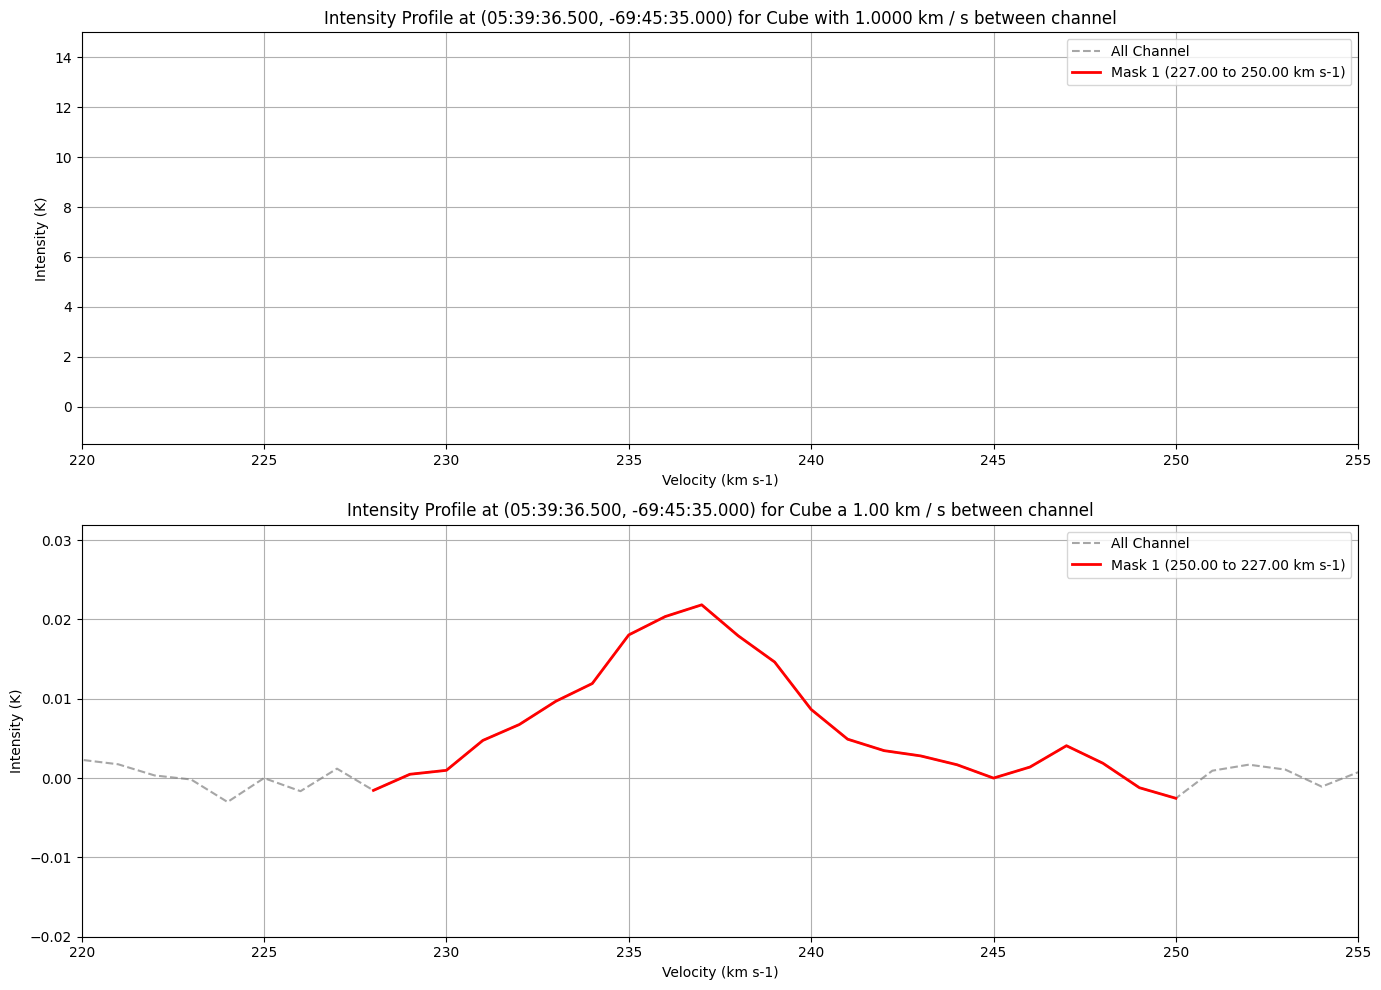

In [131]:
plt.figure(figsize=(14, 10))

# Trazado para Cubo 1
plt.subplot(2, 1, 1)
plt.plot(VEL1.value, intensity1, label='All Channel', color='gray', linestyle='--', alpha=0.7)
colors = ['red', 'blue', 'green', 'purple'] # Para diferentes rangos de máscara
for i, (v_min, v_max) in enumerate(mask_ranges_km_s):
    mask_plot = (VEL1 >= v_min * u.km/u.s) & (VEL1 <= v_max * u.km/u.s)
    plt.plot(VEL1[mask_plot].value, masked_intensities_list1[i], 
             label=f'Mask {i+1} ({v_min:.2f} to {v_max:.2f} {UNIT1})', color=colors[i % len(colors)], linewidth=2)

plt.xlabel(f'Velocity ({UNIT1})')
plt.ylabel(f'Intensity ({cube1.header['BUNIT']})')
plt.title(f'Intensity Profile at ({ra_str}, {dec_str}) for Cube with {CDELT1:.4f} between channel')
plt.grid(True)
plt.legend()
plt.xlim(fit_range_km_s)
plt.ylim(ymax=15, ymin=-1.5)

# Trazado para Cubo 2
plt.subplot(2, 1, 2)
plt.plot(VEL2.value, intensity2, label='All Channel', color='gray', linestyle='--', alpha=0.7)
for i, (v_max, v_min) in enumerate(mask_ranges_km_s):
    mask_plot = (VEL2 <= v_min * u.km/u.s) & (VEL2 >= v_max * u.km/u.s)
    plt.plot(VEL2[mask_plot].value, masked_intensities_list2[i], 
             label=f'Mask {i+1} ({v_min:.2f} to {v_max:.2f} {UNIT2})', color=colors[i % len(colors)], linewidth=2)

plt.xlabel(f'Velocity ({UNIT2})')
plt.ylabel(f'Intensity ({cube2.header['BUNIT']})')
plt.title(f'Intensity Profile at ({ra_str}, {dec_str}) for Cube a {CDELT2:.2f} between channel')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xlim(fit_range_km_s)
plt.ylim(ymin=-0.02)
plt.show()

### Using polyfit()

In [132]:
# In cube 1
# The values "velocities_to_fit1" and "intensities_to_fit1" are the velocities and intensities that were used for the fit.
# I.e. exclude the data that were masked out.
if intensities_to_fit1.size > 0:
    poly_coeff1 = np.polyfit(velocities_to_fit1.value, intensities_to_fit1, deg=polynomial_order)
    # Ahora usamos np.polyval para evaluar el polinomio con TODOS sus coeficientes
    # en el rango completo de visualización (velocities_subcube1)
    fitted_line1 = np.polyval(poly_coeff1, velocities_subcube1.value)
    print(f"\nPolinomio de grado {polynomial_order} ajustado para Cubo 1.")
else:
    print("\nNo hay datos suficientes para el ajuste de Cubo 1 después de aplicar las máscaras.")
    fitted_line1 = np.full_like(velocities_subcube1.value, np.nan) # Asignar NaNs si no hay ajuste

# In cube 2
if intensities_to_fit2.size > 0:
    poly_coeff2 = np.polyfit(velocities_to_fit2.value, intensities_to_fit2, deg=polynomial_order)
    # Similar para el Cubo 2
    fitted_line2 = np.polyval(poly_coeff2, velocities_subcube2.value)
    print(f"Polinomio de grado {polynomial_order} ajustado para Cubo 2.")
else:
    print("No hay datos suficientes para el ajuste de Cubo 2 después de aplicar las máscaras.")
    fitted_line2 = np.full_like(velocities_subcube2.value, np.nan) # Asignar NaNs si no hay ajuste



Polinomio de grado 0 ajustado para Cubo 1.
Polinomio de grado 0 ajustado para Cubo 2.


---------------------- I used all spectral axis for calculate the residual and rms ----------------------------------

This is wrong

In [133]:
# --- Calcular los residuales ---
# Los residuales se calculan para los puntos que SÍ se usaron para el ajuste.
residuals_cube1 = intensities_subcube1 - fitted_line1
residuals_cube2 = intensities_subcube2 - fitted_line2

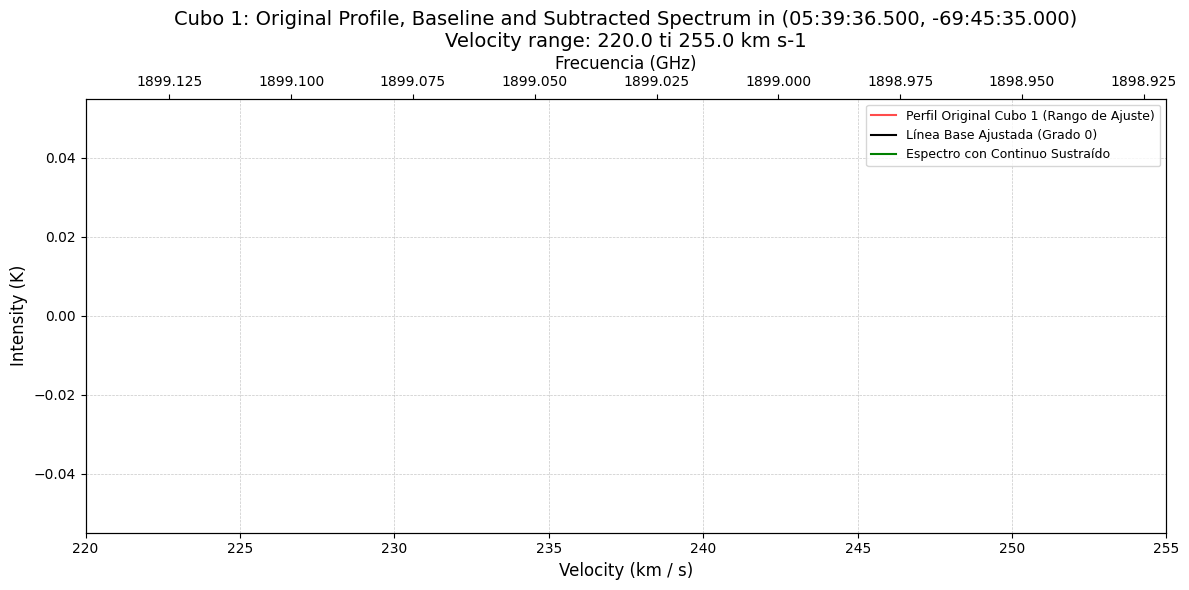

In [134]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.step(velocities_subcube1.value, intensities_subcube1, where='mid', label='Perfil Original Cubo 1 (Rango de Ajuste)', color='red', linestyle='-', alpha=0.7)

# Plotear la línea base ajustada (ahora será un polinomio)
ax1.plot(velocities_subcube1.value, fitted_line1, label=f'Línea Base Ajustada (Grado {polynomial_order})', color='black', linestyle='-', linewidth=1.5)

# Plotear el espectro con el continuo sustraído (usando los residuales_full_cube2)
ax1.step(velocities_subcube1.value, residuals_cube1, where='mid', label='Espectro con Continuo Sustraído', color='green', linewidth=1.5)

# Opcional: Para mostrar los residuales de los puntos *específicamente ajustados* (puntos que no fueron enmascarados)
#ax1.plot(velocities_to_fit1.value, intensities_to_fit1, '-', color='red', markersize=3, label='Residuales (Puntos Ajustados)')

# --- Configuración de Etiquetas y Título (resto del código es el mismo) ---
ax1.set_xlabel(f'Velocity ({u.km/u.s})', fontsize=12)
ax1.set_ylabel(f'Intensity ({cube1.header['BUNIT']})', fontsize=12)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax1.legend(loc='best', fontsize=9)
ax1.set_title(f'Cubo 1: Original Profile, Baseline and Subtracted Spectrum in ({ra_str}, {dec_str})\nVelocity range: {fit_range_km_s[0]} ti {fit_range_km_s[1]} km s-1', fontsize=14)

vel_min_plot, vel_max_plot = fit_range_km_s[0] * u.km/u.s, fit_range_km_s[1] * u.km/u.s
ax1.set_xlim(vel_min_plot.value, vel_max_plot.value)

ax2 = ax1.twiny()
freq_for_vel_max = RESTFRQ1 * (1 - vel_max_plot / C)
freq_for_vel_min = RESTFRQ1 * (1 - vel_min_plot / C)
ax2.set_xlim(freq_for_vel_min.value, freq_for_vel_max.value)
ax2.set_xlabel(f'Frecuencia ({RESTFRQ1.unit})', fontsize=12)

plt.tight_layout()
plt.show()

In [135]:

# --- Calcular RMS y Sigma ---
# take all channel including emission
rms_cube1 = np.sqrt(np.mean(residuals_cube1**2)) 
rms_cube2 = np.sqrt(np.mean(residuals_cube2**2)) 

sigma1 = rms_cube1 * 3
sigma2 = rms_cube2 * 3

print(f"RMS Cubo 1 (en rango de ajuste con exclusiones): {rms_cube1:.5f} ({cube1.header['BUNIT']}), 3-sigma: {sigma1:.5f}")
print(f"RMS Cubo 2 (en rango de ajuste con exclusiones): {rms_cube2:.5f} ({cube2.header['BUNIT']}), 3-sigma: {sigma2:.5f}")



RMS Cubo 1 (en rango de ajuste con exclusiones): nan (K), 3-sigma: nan
RMS Cubo 2 (en rango de ajuste con exclusiones): 0.00791 (K), 3-sigma: 0.02374


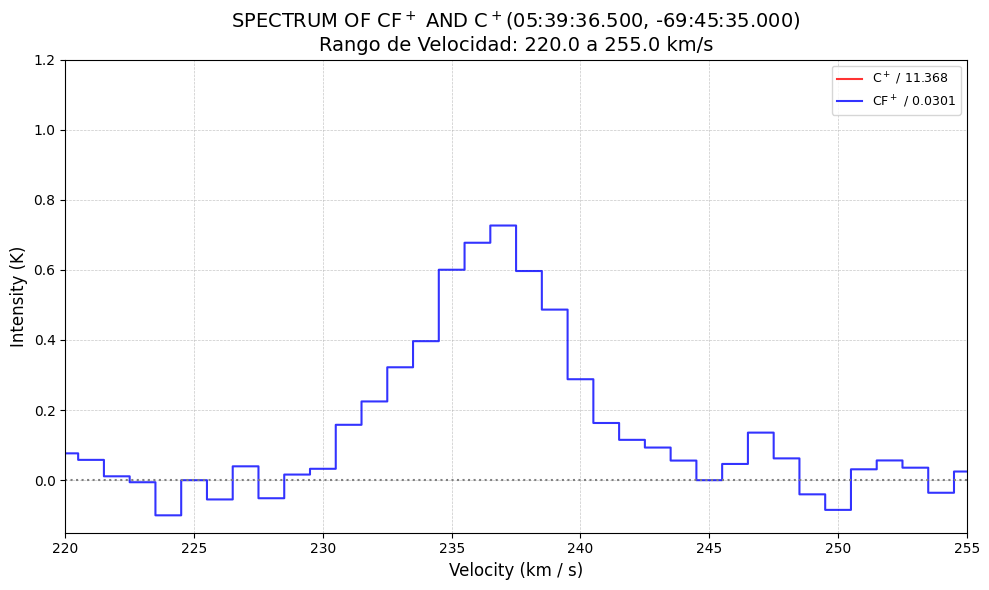

In [136]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.step(VEL1.value, intensity1/11.367965834305714, where='mid', label=r'C$^+$ / 11.368', color='red', linewidth=1.5, alpha=0.8)
#if not np.isnan(sigma1):
#    ax1.axhline(sigma1, color='darkblue', linestyle='--', linewidth=1.5, label=f'+3$\sigma_1$ ({sigma1:.2e})')
    

ax1.step(VEL2.value , intensity2/0.030054666104468553, where='mid', label=r'CF$^+$ / 0.0301', color='blue', linewidth=1.5, alpha=0.8)
#if not np.isnan(sigma2):
#    ax1.axhline(sigma2, color='darkred', linestyle='--', linewidth=1.5, label=f'+3$\sigma_2$ ({sigma2:.2e})')
    
ax1.axhline(0, color='gray', linestyle=':', linewidth=1.5) #, label='Cero Residual'

ax1.set_xlabel(f'Velocity ({u.km/u.s})', fontsize=12)
ax1.set_ylabel(f'Intensity ({cube1.header['BUNIT']})', fontsize=12)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax1.legend(loc='best', fontsize=9)
ax1.set_title('SPECTRUM OF 'r'CF$^+$ AND C$^+$' f'({ra_str}, {dec_str})\nRango de Velocidad: {fit_range_km_s[0]} a {fit_range_km_s[1]} km/s', fontsize=14)

ax1.set_xlim(vel_min_plot.value, vel_max_plot.value)

# ax2 = ax1.twiny()
# ax2.set_xlim(freq_for_vel_min.value, freq_for_vel_max.value)
# ax2.set_xlabel(f'Frecuencia ({RESTFRQ1.unit})', fontsize=12)
plt.ylim(-0.15, 1.2)
plt.tight_layout()
plt.show()

### -------------- CORRECT FORM --------------------------------
Used ionli the channel whitout the emission for obtainted the residual and rms.

In [137]:
# masking the residuals obtained from the polynomial fit (exclude the emission lines)
residuals_fitted_points1 = intensities_to_fit1 - np.polyval(poly_coeff1, velocities_to_fit1.value) # Using the linear fitting
residuals_fitted_points2 = intensities_to_fit2 - np.polyval(poly_coeff2, velocities_to_fit2.value)

# calculate the rms in new residuals
new_rms1 = np.sqrt(np.mean(residuals_fitted_points1**2))
new_rms2 = np.sqrt(np.mean(residuals_fitted_points2**2))

print(f"RMS de residuales (puntos ajustados) Cubo 1: {new_rms1:.5f}")
print(f"RMS de residuales (puntos ajustados) Cubo 2: {new_rms2:.5f}")

sigma_1 = 3 * new_rms1
sigma_2 = 3 * new_rms2

print(f"3-sigma de residuales (puntos ajustados) Cubo 1: {sigma_1:.5f}")
print(f"3-sigma de residuales (puntos ajustados) Cubo 2: {sigma_2:.5f}")

RMS de residuales (puntos ajustados) Cubo 1: nan
RMS de residuales (puntos ajustados) Cubo 2: 0.00138
3-sigma de residuales (puntos ajustados) Cubo 1: nan
3-sigma de residuales (puntos ajustados) Cubo 2: 0.00413


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\macka\AppData\Local\Temp\ipykernel_3948\3082620153.py:5: SyntaxWarning: invalid escape sequence '\s'
  ax1.axhline(sigma_1, color='orange', linestyle='--', linewidth=1.5, label=f'3$\sigma_1$ ({sigma_1:.2e})')
C:\Users\macka\AppData\Local\Temp\ipykernel_3948\3082620153.py:10: SyntaxWarning: invalid escape sequence '\s'
  ax1.axhline(sigma_2, color='red', linestyle='--', linewidth=1.5, label=f'3$\sigma_2$ ({sigma_2:.2e})')


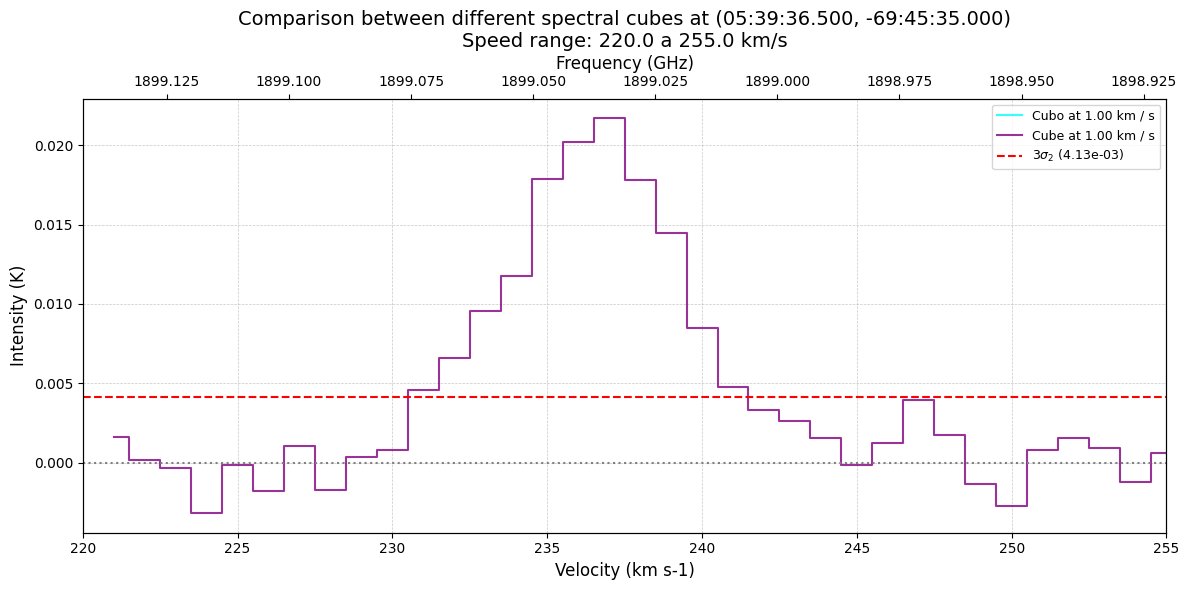

In [138]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.step(velocities_subcube1.value, residuals_cube1, where='mid', label=F'Cubo at {CDELT1:.2f}', color='cyan', linewidth=1.5, alpha=0.8)
if not np.isnan(sigma_1):
    ax1.axhline(sigma_1, color='orange', linestyle='--', linewidth=1.5, label=f'3$\sigma_1$ ({sigma_1:.2e})')
    

ax1.step(velocities_subcube2.value, residuals_cube2, where='mid', label=f'Cube at {CDELT2:.2f}', color='purple', linewidth=1.5, alpha=0.8)
if not np.isnan(sigma_2):
    ax1.axhline(sigma_2, color='red', linestyle='--', linewidth=1.5, label=f'3$\sigma_2$ ({sigma_2:.2e})')
    
ax1.axhline(0, color='gray', linestyle=':', linewidth=1.5) #, label='Cero Residual')

ax1.set_xlabel(f'Velocity ({UNIT2})', fontsize=12)
ax1.set_ylabel(f'Intensity ({cube2.header['BUNIT']})', fontsize=12)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax1.legend(loc='best', fontsize=9)
ax1.set_title(f'Comparison between different spectral cubes at ({ra_str}, {dec_str})\nSpeed range: {fit_range_km_s[0]} a {fit_range_km_s[1]} km/s', fontsize=14)

ax1.set_xlim(vel_min_plot.value, vel_max_plot.value)

ax2 = ax1.twiny()
ax2.set_xlim(freq_for_vel_min.value, freq_for_vel_max.value)
ax2.set_xlabel(f'Frequency ({RESTFRQ1.unit})', fontsize=12)
plt.tight_layout()
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\macka\AppData\Local\Temp\ipykernel_3948\821940471.py:10: SyntaxWarning: invalid escape sequence '\s'
  ax1.axhline(sigma_2, color='darkred', linestyle='--', linewidth=1.5, label=f'+3$\sigma_2$ ({sigma_2:.2e})')


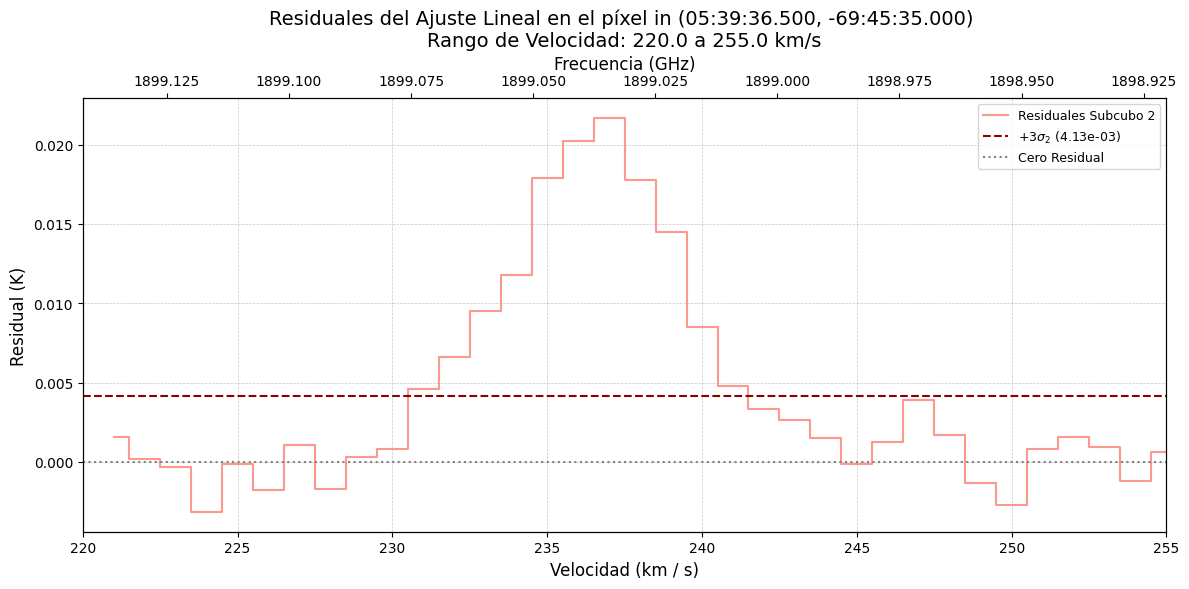

In [139]:
fig, ax1 = plt.subplots(figsize=(12, 6))

#ax1.step(velocities_subcube1.value, residuals_cube1, where='mid', label='Residuales Subcubo 1', color='lightblue', linewidth=1.5, alpha=0.8)
#if not np.isnan(sigma_1):
#    ax1.axhline(sigma_1, color='darkblue', linestyle='--', linewidth=1.5, label=f'+3$\sigma_1$ ({sigma1:.2e})')
    

ax1.step(velocities_subcube2.value, residuals_cube2, where='mid', label='Residuales Subcubo 2', color='salmon', linewidth=1.5, alpha=0.8)
if not np.isnan(sigma_2):
    ax1.axhline(sigma_2, color='darkred', linestyle='--', linewidth=1.5, label=f'+3$\sigma_2$ ({sigma_2:.2e})')
    
ax1.axhline(0, color='gray', linestyle=':', linewidth=1.5, label='Cero Residual')

ax1.set_xlabel(f'Velocidad ({u.km/u.s})', fontsize=12)
ax1.set_ylabel(f'Residual ({cube2.header['BUNIT']})', fontsize=12)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax1.legend(loc='best', fontsize=9)
ax1.set_title(f'Residuales del Ajuste Lineal en el píxel in ({ra_str}, {dec_str}) \nRango de Velocidad: {fit_range_km_s[0]} a {fit_range_km_s[1]} km/s', fontsize=14)

ax1.set_xlim(vel_min_plot.value, vel_max_plot.value)

ax2 = ax1.twiny()
ax2.set_xlim(freq_for_vel_min.value, freq_for_vel_max.value)
ax2.set_xlabel(f'Frecuencia ({RESTFRQ1.unit})', fontsize=12)
plt.tight_layout()
plt.show()

### Calculate the rms in all position of the maps

In [140]:
vel_fit_min, vel_fit_max = fit_range_km_s
mask_fit_range = (VEL1 >= vel_fit_min * u.km/u.s) & (VEL1 <= vel_fit_max * u.km/u.s)

full_mask_exclude = np.zeros(len(VEL1), dtype=bool) # Identifie all channels into the range of emission
for v_min, v_max in mask_ranges_km_s:
    mask_plot = (VEL1 >= v_min * u.km/u.s) & (VEL1 <= v_max * u.km/u.s)  # 
    full_mask_exclude |= mask_plot

include_mask = mask_fit_range & ~full_mask_exclude  # Mask to include only channels in fit range and not in emission range
include_chans = np.where(include_mask)[0]
velocities_to_fit = VEL1[include_chans]
print(velocities_to_fit)

print('---------------------')

print(f"Channels para ajuste: {len(include_chans)} de {nchan1} totales.")
if len(include_chans) <= polynomial_order:
    print("Error: No hay suficientes canales para el ajuste polinomial.")
    exit()


[220. 221. 222. 223. 224. 225. 226. 251. 252. 253. 254. 255.] km / s
---------------------
Channels para ajuste: 12 de 300 totales.


In [141]:
# Get the spatial dimensions
n_y, n_x = cube1.shape[1], cube1.shape[2]
rms_map = np.full((n_y, n_x), np.nan)  # Initialize with NaN
continuum_subtracted_data = np.full(cube1.shape, np.nan, dtype=np.float32)

In [142]:
from tqdm import tqdm

for y in tqdm(range(n_y), desc="Processing"):
    for x in range(n_x):
        # Extract the spectrum for this pixel
        intensity1 = cube1[:, y, x].value
        
        # Get intensities for fitting
        intensities_to_fit = intensity1[include_chans]
        
        # Fit the polynomial if enough data
        if len(intensities_to_fit) > polynomial_order:
            poly_coeff1 = np.polyfit(velocities_to_fit.value, intensities_to_fit, deg=polynomial_order)
            fitted_line1 = np.polyval(poly_coeff1, velocities_to_fit.value)
            
            # Compute residuals on fitted points for RMS
            residuals_fitted_points1 = intensities_to_fit - fitted_line1
            
            # Calculate RMS
            new_rms1 = np.sqrt(np.mean(residuals_fitted_points1**2))
            rms_map[y, x] = new_rms1
            
            # Calculate the continuum for all channels and subtract it
            fitted_line_full = np.polyval(poly_coeff1, VEL1.value)
            residuals_full = intensity1 - fitted_line_full
            continuum_subtracted_data[:, y, x] = residuals_full

print("\nProceso de sustracción de continuo y cálculo de RMS completado.")



Processing: 100%|██████████| 60/60 [00:10<00:00,  5.54it/s]


Proceso de sustracción de continuo y cálculo de RMS completado.


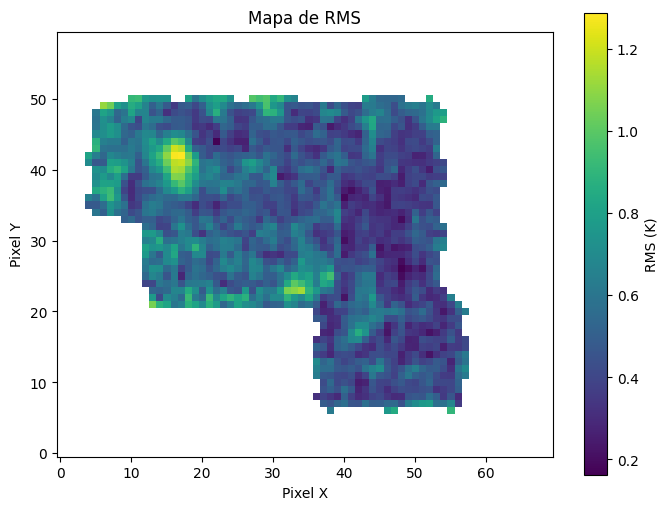

In [143]:
# Plot the RMS map
plt.figure(figsize=(8, 6))
plt.imshow(rms_map, origin='lower', cmap='viridis')
plt.colorbar(label=f'RMS ({cube1.unit})')
plt.title('Mapa de RMS')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

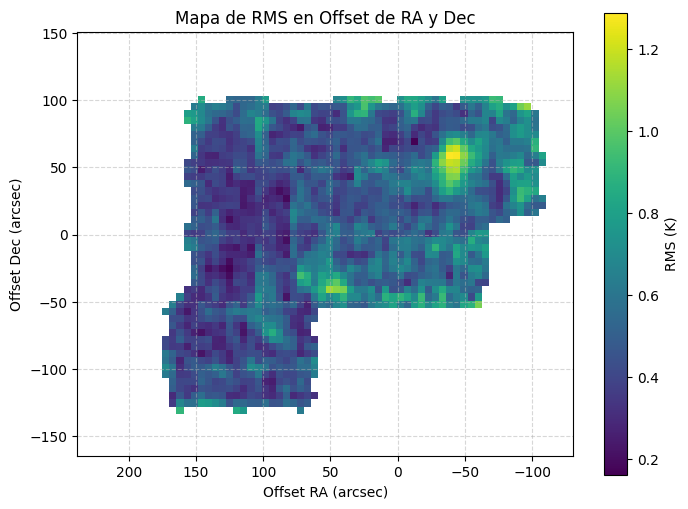

In [144]:
# Obtener el WCS celestial del cubo
wcs_celestial = cube1.wcs.celestial

# Definir la coordenada de referencia (punto central para los offsets)
# Por ejemplo, usar la coordenada proporcionada en el código original
ref_coord = SkyCoord("05h39m36.0919s", "-69d45m41.651s", frame='icrs')

# Obtener las dimensiones del mapa
n_y, n_x = rms_map.shape

# Crear arrays de coordenadas de píxeles para todos los puntos del mapa
x_pixels, y_pixels = np.meshgrid(np.arange(n_x), np.arange(n_y))

# Convertir píxeles a coordenadas celestes (RA, Dec)
ra, dec = wcs_celestial.pixel_to_world_values(x_pixels, y_pixels)

# Convertir RA y Dec a grados (si no están ya en grados)
ra = np.array(ra)  # Asegurarse de que sea un array numérico
dec = np.array(dec)

# Calcular los offsets en segundos de arco respecto a la coordenada de referencia
# RA offset = (RA - RA_ref) * cos(Dec_ref) * 3600 (para convertir a segundos de arco)
# Dec offset = (Dec - Dec_ref) * 3600
ra_ref = ref_coord.ra.deg
dec_ref = ref_coord.dec.deg
ra_offset = (ra - ra_ref) * np.cos(np.deg2rad(dec_ref)) * 3600  # Segundos de arco
dec_offset = (dec - dec_ref) * 3600  # Segundos de arco

# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar el mapa de RMS usando imshow con extent para los offsets
# extent=[left, right, bottom, top] define los límites en los ejes
plt.imshow(rms_map, origin='lower', cmap='viridis',
           extent=[ra_offset.min(), ra_offset.max(), dec_offset.min(), dec_offset.max()])

# Agregar barra de color
plt.colorbar(label=f'RMS ({cube1.unit})')
plt.grid(True, linestyle='--', alpha=0.5)
# Etiquetas de los ejes
plt.xlabel('Offset RA (arcsec)')
plt.ylabel('Offset Dec (arcsec)')

# Título
plt.title('Mapa de RMS en Offset de RA y Dec')

# Invertir el eje RA (convención astronómica: RA aumenta hacia la izquierda)
plt.gca().invert_xaxis()

# Mostrar el gráfico
plt.show()

In [145]:
# Define las coordenadas de píxel
x_pixel = int(np.rint(np.asarray(x1)))
y_pixel = int(np.rint(np.asarray(y1)))  # Ejemplo: píxel en Y
print(f'Coordenadas de píxel para RMS: x={x_pixel}, y={y_pixel}')

# Obtener el valor del RMS en esa posición
if 0 <= y_pixel < rms_map.shape[0] and 0 <= x_pixel < rms_map.shape[1]:
    rms_value = rms_map[y_pixel, x_pixel]
    print(f"Valor del RMS en píxel ({x_pixel}, {y_pixel}): {rms_value:.5f} {cube1.unit}")
else:
    print("Error: Las coordenadas de píxel están fuera del rango del mapa.")

Coordenadas de píxel para RMS: x=44, y=32
Valor del RMS en píxel (44, 32): 0.33671 K


In [146]:
# Calcular la desviación estándar de los valores de RMS (excluyendo NaN)
valid_rms_values = rms_map[~np.isnan(rms_map)]  # Selecciona valores no-NaN
if len(valid_rms_values) > 0:
    rms_std = np.std(valid_rms_values)
    rms_mean = np.mean(valid_rms_values)
    print(f"Desviación estándar de los valores de RMS: {rms_std:.5f} {cube1.unit}")
    print(f"Media de los valores de RMS: {rms_mean:.5f} {cube1.unit}")
    print(f"Número de valores válidos (no-NaN): {len(valid_rms_values)}")
else:
    print("No hay valores de RMS válidos (todos son NaN).")

Desviación estándar de los valores de RMS: 0.16879 K
Media de los valores de RMS: 0.51242 K
Número de valores válidos (no-NaN): 1676


### Adjust a Gaussian Fit
https://radio-astro-tools.github.io/tutorials/fitting_with_spectralcube.html
